# Final Project

In this sample final project, students will learn how to pick an image, approximate its contour with polynomial functions, and use integrals to calculate the total area of the picture. This project serves as a basis for understanding image processing and mathematical approximation techniques. We will illustrate this process using an image of Bluey.

## Importing the image

This section of the code is responsible for importing an image file into the project.
The imported image can then be processed or analyzed as needed in subsequent steps.

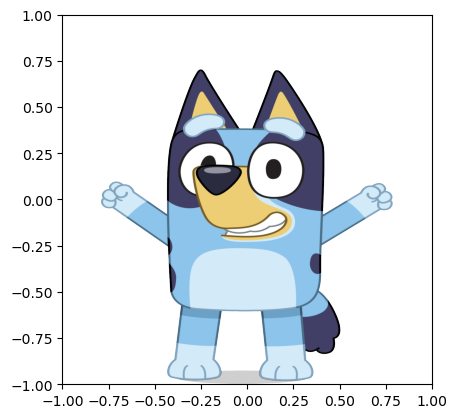

In [1]:
import matplotlib


import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the image
img = mpimg.imread('Bluey.png')

# Function to plot points on the image
def plot_points_on_image(img, points=[]):
    %matplotlib inline
    fig, ax = plt.subplots()
    ax.imshow(img, extent=[-1, 1, -1, 1])
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    if points:
        x_points, y_points = zip(*points)
        for i, (x, y) in enumerate(points):
            ax.text(x, y, str(i), color="black", fontsize=10)
        ax.plot(x_points, y_points, 'ro')  # 'ro' means red color, round points
    plt.show()

# Plot the image
plot_points_on_image(img)



## Adding points on the contours

The next step consists in identifying relevant point in the contour that will be used in a polynomial approximation.

You may run this code several time to retrieve all the points

Selected points: [(0.3517316017316019, -0.9177489177489175), (0.3517316017316019, -0.9448051948051946), (0.2976190476190479, -0.9610389610389609), (0.2759740259740262, -0.9610389610389609), (0.2002164502164503, -0.9718614718614718), (0.16233766233766245, -0.9664502164502162), (0.10281385281385291, -0.9556277056277054), (0.0703463203463206, -0.9448051948051946), (0.08658008658008676, -0.896103896103896), (0.10822510822510845, -0.8690476190476188), (0.08116883116883122, -0.5984848484848483), (-0.027056277056277, -0.6038961038961037)]


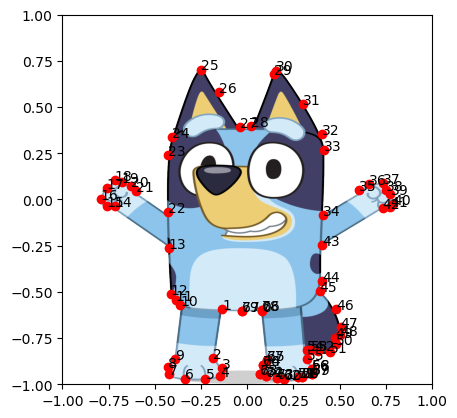

In [5]:
import pickle

# Function to select points on the image
def select_points_on_image(img):
    matplotlib.use('TkAgg')
    # Display the image again to select points
    fig, ax = plt.subplots()
    ax.imshow(img, extent=[-1, 1, -1, 1])
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)

    # Use ginput to select points
    points = plt.ginput(n=-1, timeout=120, show_clicks=True)  # n=100 allows up to 100 points, timeout=10 waits for 10 seconds
    plt.close(fig)
    return points

# Call the function to select points
points = select_points_on_image(img)

# Save the points to a file
# Load existing points from the file if it exists
try:
    with open('points.pkl', 'rb') as f:
        existing_points = pickle.load(f)
except FileNotFoundError:
    existing_points = []

# Add new points to the existing points
all_points = existing_points + points

# Save all points back to the file
with open('points.pkl', 'wb') as f:
    pickle.dump(all_points, f)

%matplotlib inline
# Print the selected points
print("Selected points:", points)

# Show the plot
plot_points_on_image(img, all_points)

## Some Utility Functions
These utility functions are used to perform polynomial approximation on a set of points and plot the resulting polynomial functions over specified intervals.

- The `polynomial_approximation` function fits a polynomial of a given degree to the provided points and returns a tuple $(poly, P)$, where $poly$ is the polynomial function and $P$ is the provided points.

- The `plot_functions_on_interval` function takes a list of tuples $(poly, P)$ and plots them on a graph.


In [119]:
import sympy as sp
import numpy as np

def polynomial_approximation(points, degree):
    # if len(points) < degree + 1:
        # return None  # Not enough points to fit the polynomial

    x = sp.symbols('x')
    X = np.array([p[0] for p in points])
    Y = np.array([p[1] for p in points])

    # Fit polynomial using numpy's polyfit
    coeffs = np.polyfit(X, Y, degree)

    # Create polynomial function using sympy
    poly = sum(c * x**i for i, c in enumerate(reversed(coeffs)))
    
    return poly, points

def plot_functions_on_interval(functions):
    %matplotlib inline
    
    # plot the image centered
    fig, ax = plt.subplots()
    ax.imshow(img, extent=[-1, 1, -1, 1])
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    
    
    x = sp.symbols('x')

    for i, (func, points) in enumerate(functions):
        interval = [min([p[0] for p in points]), max([p[0] for p in points])]
        f_lambdified = sp.lambdify(x, func, 'numpy')
        x_vals = np.linspace(interval[0], interval[1], 100)
        y_vals = f_lambdified(x_vals)
        plt.plot(x_vals, y_vals, label=f'f_{i}')
        
        plt.scatter([p[0] for p in points], [p[1] for p in points], color='red')
    
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=6)

    #plt.legend()
    
    
    
    plt.show()

# # Example usage
# points = [(0, 1), (1, 2), (2, 3), (3, 4)]
# degree = 3
# poly_func = polynomial_approximation(points, degree)
# display(poly_func[0])

# # Example usage
# functions = [poly_func]
# plot_functions_on_interval(functions)



## Separating the points for polynomial approximation

In this section, we will separate the retrieved points into subsets. These subsets will be used for polynomial approximation, allowing us to fit a polynomial curve to the data points.

/tmp/ipykernel_20363/3512013248.py:13: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(X, Y, degree)
/tmp/ipykernel_20363/3512013248.py:13: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(X, Y, degree)


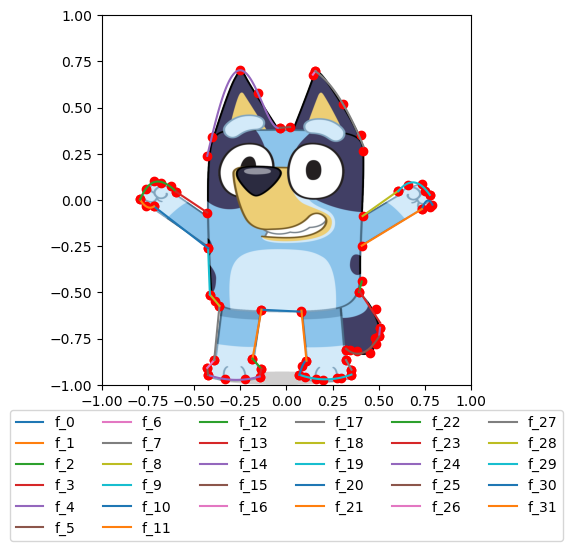

In [120]:
# Load the points from the file
with open('points.pkl', 'rb') as f:
    points = pickle.load(f)


points_set_degree = []


points_set_degree.append((points[0:2],1))
points_set_degree.append((points[1:3],1))
points_set_degree.append((points[2:4],1))
points_set_degree.append((points[3:5],1))
points_set_degree.append((points[4:8],2))
points_set_degree.append((points[7:9],1))
points_set_degree.append((points[8:10],1))
points_set_degree.append((points[9:11],1))
points_set_degree.append((points[10:13],2))
points_set_degree.append((points[12:14],1))
points_set_degree.append((points[13:15],1))
points_set_degree.append((points[14:17],2))
points_set_degree.append((points[16:22],4))
points_set_degree.append((points[21:23],1))
points_set_degree.append((points[23:28],4))
points_set_degree.append((points[27:29],1))
points_set_degree.append((points[29:31],1))
points_set_degree.append((points[30:34],2))
points_set_degree.append((points[34:36],1))
points_set_degree.append((points[35:40],2))
points_set_degree.append((points[39:43],2))
points_set_degree.append((points[42:44],1))
points_set_degree.append((points[44:46],1))
points_set_degree.append((points[45:48],1))
points_set_degree.append((points[47:49],1))
points_set_degree.append((points[48:55],2))
points_set_degree.append((points[54:56],1))
points_set_degree.append((points[55:57],1))
points_set_degree.append((points[56:58],1))
points_set_degree.append((points[57:64],2))
points_set_degree.append((points[63:66],2))
points_set_degree.append((points[65:67],1))



# The Tuple of polynomial functions and their x ranges
functions = []    
for points, degree in points_set_degree:
    functions.append(polynomial_approximation(points, degree))

# Plot the functions
plot_functions_on_interval(functions)



## Total Superficy

We use integral calculus to compute the total superficy of the image from the polynomial approximation

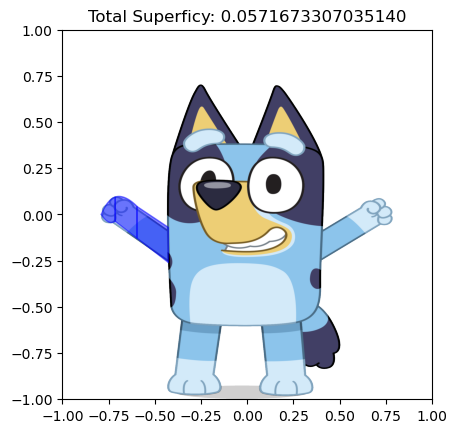

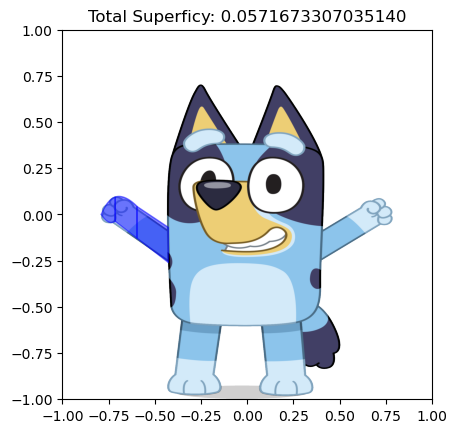

'The superficy of the selected areas is: '

0.0571673307035140

In [ ]:
# Function to calculate the area between two functions

def get_superficy(functions, function_tuples_index):
    %matplotlib inline
    
    # plot the image centered
    fig, ax = plt.subplots()
    ax.imshow(img, extent=[-1, 1, -1, 1])
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    
    superficy = 0
    for i,j in function_tuples_index:
        f1 = functions[i][0]
        f2 = functions[j][0]
        range1 = [min([p[0] for p in functions[i][1]]), max([p[0] for p in functions[i][1]])]
        range2 = [min([p[0] for p in functions[j][1]]), max([p[0] for p in functions[j][1]])]
        interval = [max(range1[0], range2[0]), min(range1[1], range2[1])]
        x = sp.symbols('x')
        
        # Calculate the integral of the difference between the two functions
        def_int = sp.integrate(f1 - f2, (x, interval[0], interval[1]))
        
        # Calculate the absolute value of the integral
        abs_int = sp.Abs(def_int)
        superficy += abs_int
        
        # Plot the area between the two functions
        f1_lambdified = sp.lambdify(x, f1, 'numpy')
        f2_lambdified = sp.lambdify(x, f2, 'numpy')
        x_vals = np.linspace(interval[0], interval[1], 100)
        y_vals1 = f1_lambdified(x_vals)
        y_vals2 = f2_lambdified(x_vals)
        plt.fill_between(x_vals, y_vals1, y_vals2, color='blue', alpha=0.5)
        
    plt.title('Total Superficy: ' + str(superficy))
    plt.show() 
        
    return superficy

function_tuples_index = []

# Left Arm
function_tuples_index.append((10,12))
function_tuples_index.append((10,13))
function_tuples_index.append((11,12))
function_tuples_index.append((12,13))

get_superficy(functions, function_tuples_index)

display("The superficy of the selected areas is: ", get_superficy(functions, function_tuples_index))
